<a href="https://colab.research.google.com/github/seon0415/BPA-/blob/main/%EB%B0%95%EC%84%9C%EC%97%B029_0326_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
ebola=pd.read_csv('country_timeseries.csv')

많은 것이 na이면 지식 활용해서 최대한 살리기

# **missingno**

<Axes: >

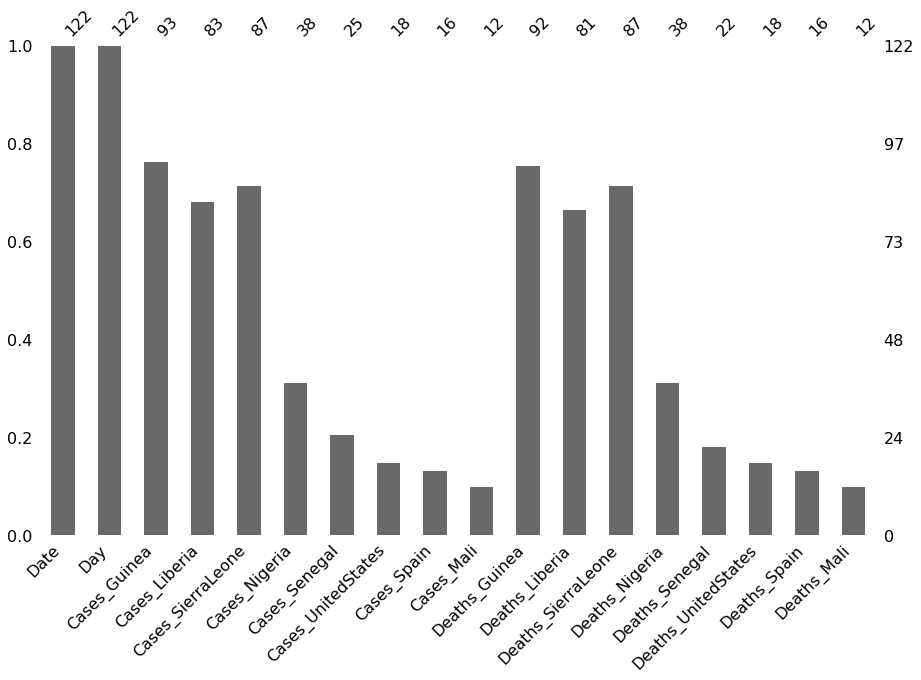

In [4]:
import missingno as msno
msno.bar(df=ebola, figsize=(15,9))

<Axes: >

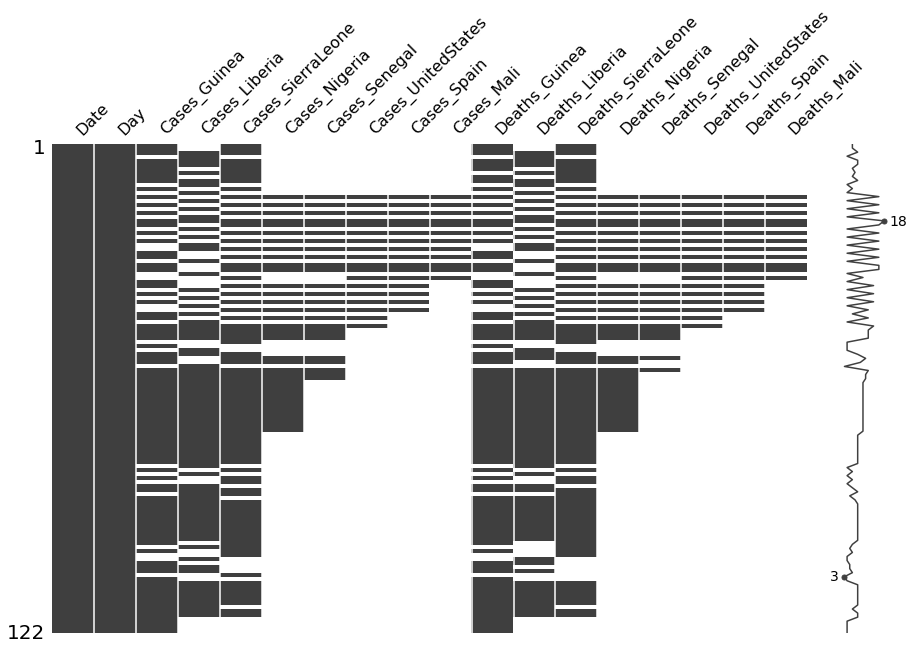

In [5]:
msno.matrix(df=ebola, figsize=(15,9) )
#인덱스기준으로 어디가 깨져있는지 볼 수 있다

In [8]:
ebola.iloc[0:10, 0:5]['Cases_Liberia']

0       NaN
1       NaN
2    8166.0
3    8157.0
4    8115.0
5    8018.0
6       NaN
7    7977.0
8       NaN
9    7862.0
Name: Cases_Liberia, dtype: float64

In [9]:
ebola.iloc[0:10, 0:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,NaN,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,NaN,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [13]:
ebola.iloc[0:10, 0:5]['Cases_Liberia'].mean()

8049.166666666667

In [12]:
ebola.fillna(0).iloc[0:10, 0:5]['Cases_Liberia'].mean()

4829.5

# **누락값 대체하는 방법**
- fillna
- ffill
- bfill

In [15]:
ebola.iloc[0:10, 0:5]['Cases_Liberia']
#인덱스 1,2,6,8

0       NaN
1       NaN
2    8166.0
3    8157.0
4    8115.0
5    8018.0
6       NaN
7    7977.0
8       NaN
9    7862.0
Name: Cases_Liberia, dtype: float64

In [14]:
ebola.fillna(method='ffill').iloc[0:10, 0:5]['Cases_Liberia']
#인덱스 6,8이 위에 값으로 채워짐

0       NaN
1       NaN
2    8166.0
3    8157.0
4    8115.0
5    8018.0
6    8018.0
7    7977.0
8    7977.0
9    7862.0
Name: Cases_Liberia, dtype: float64

In [17]:
ebola.fillna(method='ffill').iloc[0:10, 0:5]['Cases_Liberia'].mean()

8036.25

In [16]:
ebola.fillna(method='bfill').iloc[0:10, 0:5]['Cases_Liberia']
#인덱스 1,2,6,8이 밑의 값으로 채워짐

0    8166.0
1    8166.0
2    8166.0
3    8157.0
4    8115.0
5    8018.0
6    7977.0
7    7977.0
8    7862.0
9    7862.0
Name: Cases_Liberia, dtype: float64

In [18]:
ebola.fillna(method='bfill').iloc[0:10, 0:5]['Cases_Liberia'].mean()

8046.6

# **누락값 대체2**
- 보간법
- interpolate(method=)
- 선형보간, spline 보간법 

### **보간법**

In [23]:
ebola.interpolate().iloc[0:10, 0:5]['Cases_Liberia']
#인덱스 6,8이 중간값으로 채워짐

0       NaN
1       NaN
2    8166.0
3    8157.0
4    8115.0
5    8018.0
6    7997.5
7    7977.0
8    7919.5
9    7862.0
Name: Cases_Liberia, dtype: float64

<Axes: >

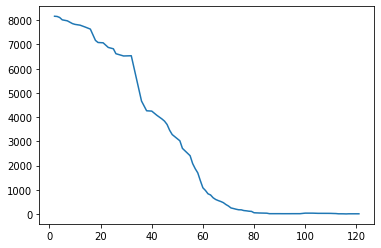

In [25]:
ebola.interpolate()['Cases_Liberia'].plot()

### **선형보간법**

<Axes: >

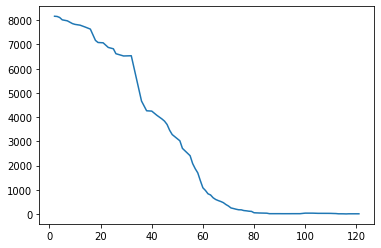

In [26]:
ebola.interpolate(method='linear')['Cases_Liberia'].plot()

### **spline 보간법**

<Axes: >

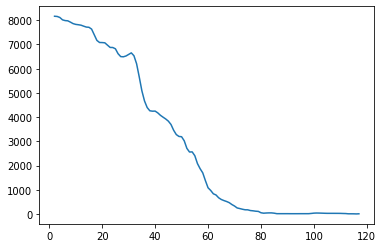

In [29]:
ebola.interpolate(method='quadratic')['Cases_Liberia'].plot()

### **올바르지 않은 누락값대체 예시**

<Axes: >

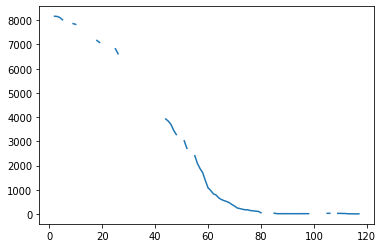

In [19]:
ebola['Cases_Liberia'].plot()
#트렌드를 캐치하고 그에 맞는 보간법 선택하기!!

<Axes: >

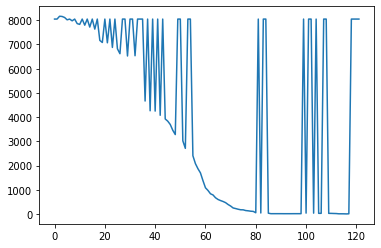

In [22]:
ebola.fillna(8049.2)['Cases_Liberia'].plot()
#감소하는 추세인데, 평균으로 채워지면 갑자기 형태가 바뀜

# **열과 피벗**

## **melt 함수**
- melt 메서드 인자
- id_vars: 위치를 그대로 유지할 열의 이름을 지정
- value_vars: 행으로 위치를 변경할 열의 이름을 지정
- var_name: 

In [33]:
pew=pd.read_csv('pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [32]:
pd.melt(pew, id_vars='religion')  #id_vars 축을 뜻함

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [34]:
pd.melt(pew, id_vars='religion', var_name='income', value_name='count')

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [35]:
bill=pd.read_csv('billboard.csv')
bill

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# 축을 1개 아닌 2개
bill_df=pd.melt(bill, id_vars=['year', 'artist', 'track', 'time', 'date.entered'])

In [39]:
bill_df.drop_duplicates()

,year,artist,track,time,date.entered,variable,value
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [ ]:
.to_frame